In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
warnings.simplefilter('ignore')
matplotlib.rcParams['figure.dpi'] = 100
sns.set()
%matplotlib inline

In [2]:
data_dir = '/home/luoyuhao/Datasets/kaggle/energy'
building = pd.read_csv(data_dir + '/building_metadata.csv')
weather_train = pd.read_csv(data_dir + '/weather_train.csv')
#weather_test = pd.read_csv(data_dir + '/weather_test.csv')
train = pd.read_csv(data_dir + '/train.csv')
#test = pd.read_csv(data_dir + '/test.csv')


In [4]:
building = pd.read_csv(data_dir + '/building_metadata.csv')
weather_train = pd.read_csv(data_dir + '/weather_train.csv')
train = train.merge(building, on='building_id', how='left')
#test = test.merge(building, on='building_id', how='left')

train = train.merge(weather_train, on=['site_id', 'timestamp'], how='left')
#test = test.merge(weather_test, on=['site_id', 'timestamp'], how='left')
del weather_train, building
gc.collect();

In [5]:
# Saving some memory
d_types = {'building_id': np.int16,
          'meter': np.int8,
          'site_id': np.int8,
          'primary_use': 'category',
          'square_feet': np.int32,
          'year_built': np.float16,
          'floor_count': np.float16,
          'air_temperature': np.float32,
          'cloud_coverage': np.float16,
          'dew_temperature': np.float32,
          'precip_depth_1_hr': np.float16,
          'sea_level_pressure': np.float32,
          'wind_direction': np.float16,
          'wind_speed': np.float32}

for feature in d_types:
    train[feature] = train[feature].astype(d_types[feature])
    #test[feature] = test[feature].astype(d_types[feature])
    
train["timestamp"] = pd.to_datetime(train["timestamp"])
#test["timestamp"] = pd.to_datetime(test["timestamp"])
gc.collect();

In [29]:
display(train.head())

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.700012,0.0,0.0
1,1,0,2016-01-01,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.700012,0.0,0.0
2,2,0,2016-01-01,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.700012,0.0,0.0
3,3,0,2016-01-01,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.700012,0.0,0.0
4,4,0,2016-01-01,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.700012,0.0,0.0


[Education]
Categories (1, object): [Education]


In [30]:
for bid in train['building_id'].unique():   
    print(train[train['building_id']==bid]['primary_use'].unique())

[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Lodging/residential]
Categories (1, object): [Lodging/residential]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Office]
Categories (1, object): [Office]
[Entertainment/public assembly]
Categories (1, object): [Entertainment/public assembly]
[Education]
Categories (1, object): [Education]
[Lodging/residential]
Categories (1, object): [Lodging/residential]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Office]
Categories (1, object): [Office]
[Education]
Categories (1, object): [Education]
[Office]
Categories (1, object): [Office]
[Education]
Categories (1, object): [Education]
[Office]
Categories (1, ob

[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Retail]
Categories (1, object): [Retail]
[Office]
Categories (1, object): [Office]
[Office]
Categories (1, object): [Office]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Entertainment/public assembly]
Categories (1, object): [Entertainment/public assembly]
[Office]
Categories (1, object): [Office]
[Food sales and service]
Categories (1, object): [Food sales and service]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Entertainment/public assembly]
Categories (1, object): [Entertainment/public assembly]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Religious worship]
Categories (1, object): [Religious

[Entertainment/public assembly]
Categories (1, object): [Entertainment/public assembly]
[Public services]
Categories (1, object): [Public services]
[Office]
Categories (1, object): [Office]
[Office]
Categories (1, object): [Office]
[Public services]
Categories (1, object): [Public services]
[Education]
Categories (1, object): [Education]
[Public services]
Categories (1, object): [Public services]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Entertainment/public assembly]
Categories (1, object): [Entertainment/public assembly]
[Education]
Categories (1, object): [Education]
[Entertainment/public assembly]
Categories (1, object): [Entertainment/public assembly]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Entertainment/public assembly]
Categories (1, object): [Entertainment/public assembly]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]


[Entertainment/public assembly]
Categories (1, object): [Entertainment/public assembly]
[Public services]
Categories (1, object): [Public services]
[Education]
Categories (1, object): [Education]
[Public services]
Categories (1, object): [Public services]
[Public services]
Categories (1, object): [Public services]
[Public services]
Categories (1, object): [Public services]
[Office]
Categories (1, object): [Office]
[Public services]
Categories (1, object): [Public services]
[Public services]
Categories (1, object): [Public services]
[Office]
Categories (1, object): [Office]
[Public services]
Categories (1, object): [Public services]
[Public services]
Categories (1, object): [Public services]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Public services]
Categories (1, object): [Public services]
[Public services]
Categories (1, object): [Public services]
[Office]
Categories (1, object): [Office]
[Entertainment/public assembly]
Categories

[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Parking]
Categories (1, object): [Parking]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Entertainment/public assembly]
Categories (1, object): [Entertainment/public assembly]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Entertainment/public assembly]
Categories (1, object): [Entertainment/public assembly]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Education]


[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Office]
Categories (1, object): [Office]
[Entertainment/public assembly]
Categories (1, object): [Entertainment/public assembly]
[Other]
Categories (1, object): [Other]
[Entertainment/public assembly]
Categories (1, object): [Entertainment/public assembly]
[Other]
Categories (1, object): [Other]
[Entertainment/public assembly]
Categories (1, object): [Entertainment/public assembly]
[Entertainment/public assembly]
Catego

[Office]
Categories (1, object): [Office]
[Entertainment/public assembly]
Categories (1, object): [Entertainment/public assembly]
[Office]
Categories (1, object): [Office]
[Lodging/residential]
Categories (1, object): [Lodging/residential]
[Lodging/residential]
Categories (1, object): [Lodging/residential]
[Lodging/residential]
Categories (1, object): [Lodging/residential]
[Lodging/residential]
Categories (1, object): [Lodging/residential]
[Lodging/residential]
Categories (1, object): [Lodging/residential]
[Lodging/residential]
Categories (1, object): [Lodging/residential]
[Lodging/residential]
Categories (1, object): [Lodging/residential]
[Entertainment/public assembly]
Categories (1, object): [Entertainment/public assembly]
[Services]
Categories (1, object): [Services]
[Office]
Categories (1, object): [Office]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Entertainment/public assembly]
Categories (1, object): [Entertainment/public as

[Office]
Categories (1, object): [Office]
[Office]
Categories (1, object): [Office]
[Education]
Categories (1, object): [Education]
[Office]
Categories (1, object): [Office]
[Office]
Categories (1, object): [Office]
[Lodging/residential]
Categories (1, object): [Lodging/residential]
[Office]
Categories (1, object): [Office]
[Office]
Categories (1, object): [Office]
[Office]
Categories (1, object): [Office]
[Education]
Categories (1, object): [Education]
[Parking]
Categories (1, object): [Parking]
[Office]
Categories (1, object): [Office]
[Office]
Categories (1, object): [Office]
[Education]
Categories (1, object): [Education]
[Lodging/residential]
Categories (1, object): [Lodging/residential]
[Office]
Categories (1, object): [Office]
[Office]
Categories (1, object): [Office]
[Other]
Categories (1, object): [Other]
[Public services]
Categories (1, object): [Public services]
[Food sales and service]
Categories (1, object): [Food sales and service]
[Office]
Categories (1, object): [Office

[Education]
Categories (1, object): [Education]
[Food sales and service]
Categories (1, object): [Food sales and service]
[Public services]
Categories (1, object): [Public services]
[Education]
Categories (1, object): [Education]
[Office]
Categories (1, object): [Office]
[Healthcare]
Categories (1, object): [Healthcare]
[Entertainment/public assembly]
Categories (1, object): [Entertainment/public assembly]
[Public services]
Categories (1, object): [Public services]
[Public services]
Categories (1, object): [Public services]
[Office]
Categories (1, object): [Office]
[Office]
Categories (1, object): [Office]
[Office]
Categories (1, object): [Office]
[Office]
Categories (1, object): [Office]
[Office]
Categories (1, object): [Office]
[Education]
Categories (1, object): [Education]
[Office]
Categories (1, object): [Office]
[Lodging/residential]
Categories (1, object): [Lodging/residential]
[Healthcare]
Categories (1, object): [Healthcare]
[Public services]
Categories (1, object): [Public se

[Lodging/residential]
Categories (1, object): [Lodging/residential]
[Lodging/residential]
Categories (1, object): [Lodging/residential]
[Lodging/residential]
Categories (1, object): [Lodging/residential]
[Lodging/residential]
Categories (1, object): [Lodging/residential]
[Lodging/residential]
Categories (1, object): [Lodging/residential]
[Lodging/residential]
Categories (1, object): [Lodging/residential]
[Entertainment/public assembly]
Categories (1, object): [Entertainment/public assembly]
[Education]
Categories (1, object): [Education]
[Lodging/residential]
Categories (1, object): [Lodging/residential]
[Lodging/residential]
Categories (1, object): [Lodging/residential]
[Lodging/residential]
Categories (1, object): [Lodging/residential]
[Utility]
Categories (1, object): [Utility]
[Entertainment/public assembly]
Categories (1, object): [Entertainment/public assembly]
[Education]
Categories (1, object): [Education]
[Education]
Categories (1, object): [Education]
[Education]
Categories (

[0.17347228 0.40009967 0.56344869 0.81455261 0.92832208 0.93907485
 0.99289299 0.99504652 0.99521876 1.         1.         1.
 1.         1.         1.        ]


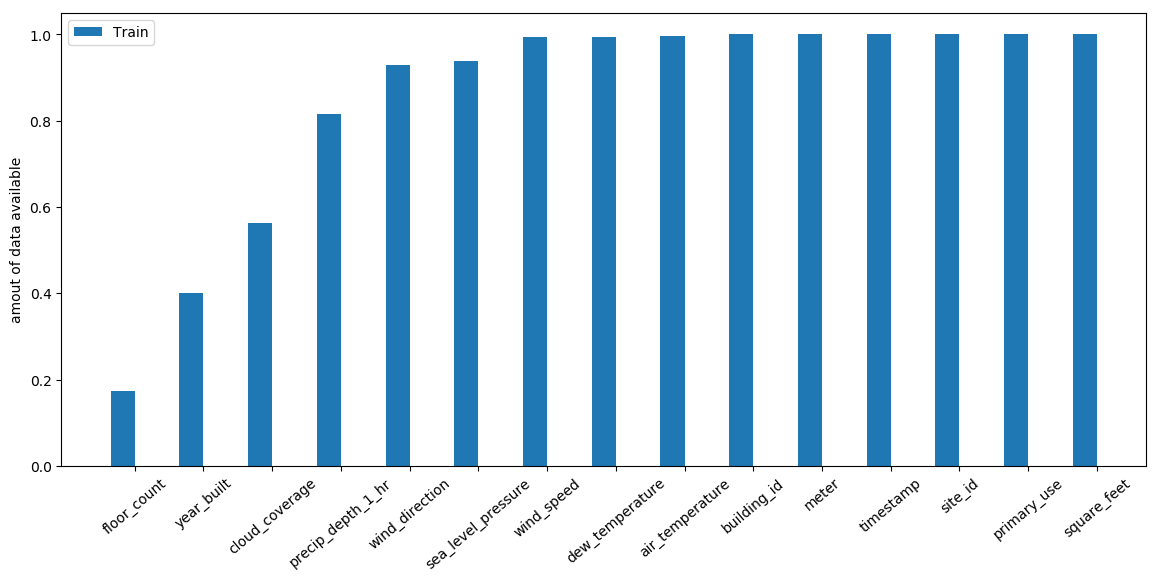

In [15]:
train_data = (train.count()/ len(train)).drop('meter_reading').sort_values().values

ind = np.arange(len(train_data))
width = 0.35
fig,axes = plt.subplots(1,1,figsize=(14,6),dpi=100) 
tr = axes.bar(ind,train_data,width)
axes.set_ylabel('amout of data available')
axes.set_xticks(ind + width / 2)
axes.set_xticklabels((train.count() / len(train)).drop('meter_reading').sort_values().index, rotation=40)
axes.legend([tr], ['Train'])
print(train_data)

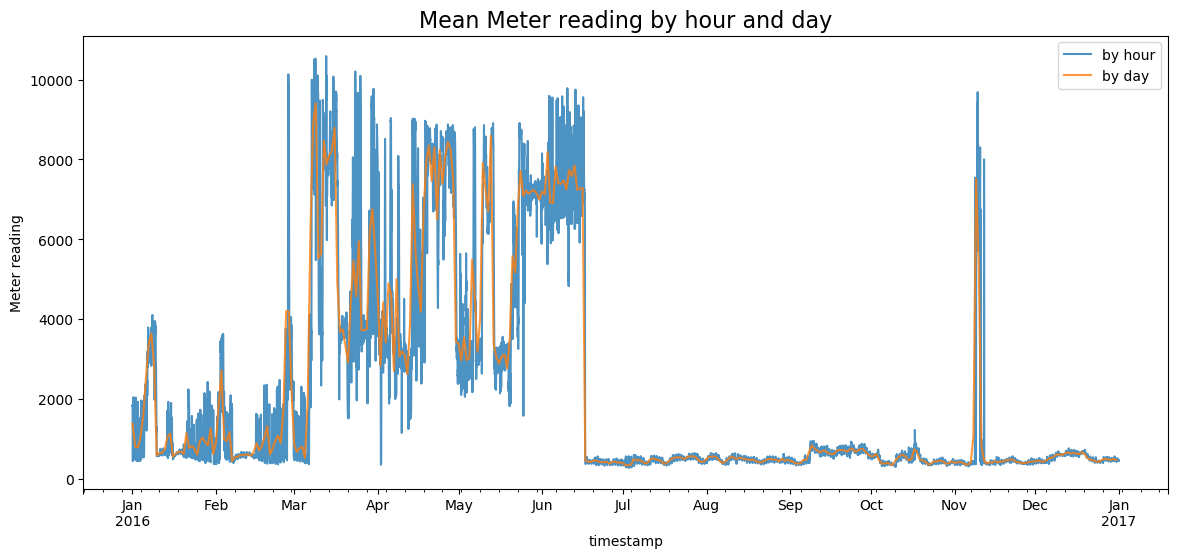

In [20]:
#Mean meter reading by day
fig,axes = plt.subplots(1,1,figsize=(14,6),dpi=100)
train[['timestamp','meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading']. \
plot(ax=axes,label='by hour',alpha=0.8).set_ylabel('Meter reading')
train[['timestamp','meter_reading']].set_index('timestamp').resample('D').mean()['meter_reading']. \
plot(ax=axes,label='by day',alpha=0.8).set_ylabel('Meter reading')
axes.set_title('Mean Meter reading by hour and day', fontsize=16);
axes.legend();

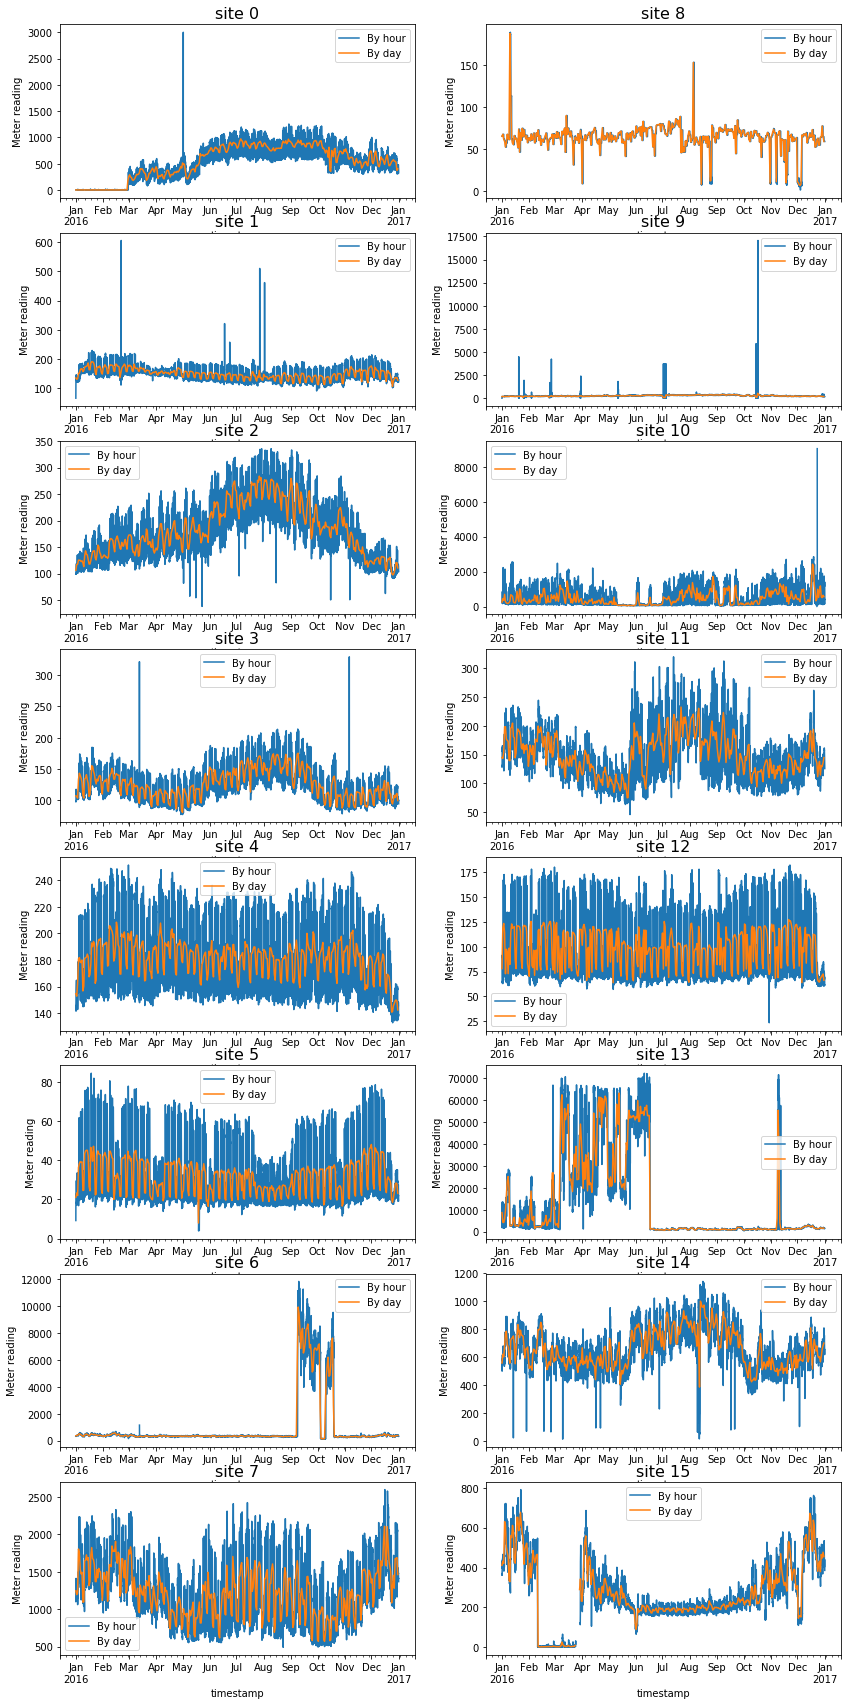

In [28]:
fig,axes = plt.subplots(8,2,figsize=(14,30))
for i in (train['site_id'].unique()):
    train[train['site_id'] == i][['timestamp','meter_reading']].set_index('timestamp')\
    .resample('H').mean()['meter_reading'].plot(ax=axes[i%8][i//8],label='By hour').set_ylabel('Meter reading')
    train[train['site_id'] == i][['timestamp','meter_reading']].set_index('timestamp')\
    .resample('D').mean()['meter_reading'].plot(ax=axes[i%8][i//8],label='By day').set_ylabel('Meter reading')
    axes[i%8][i//8].set_title('site {}'.format(i), fontsize=16);
    axes[i%8][i//8].legend()


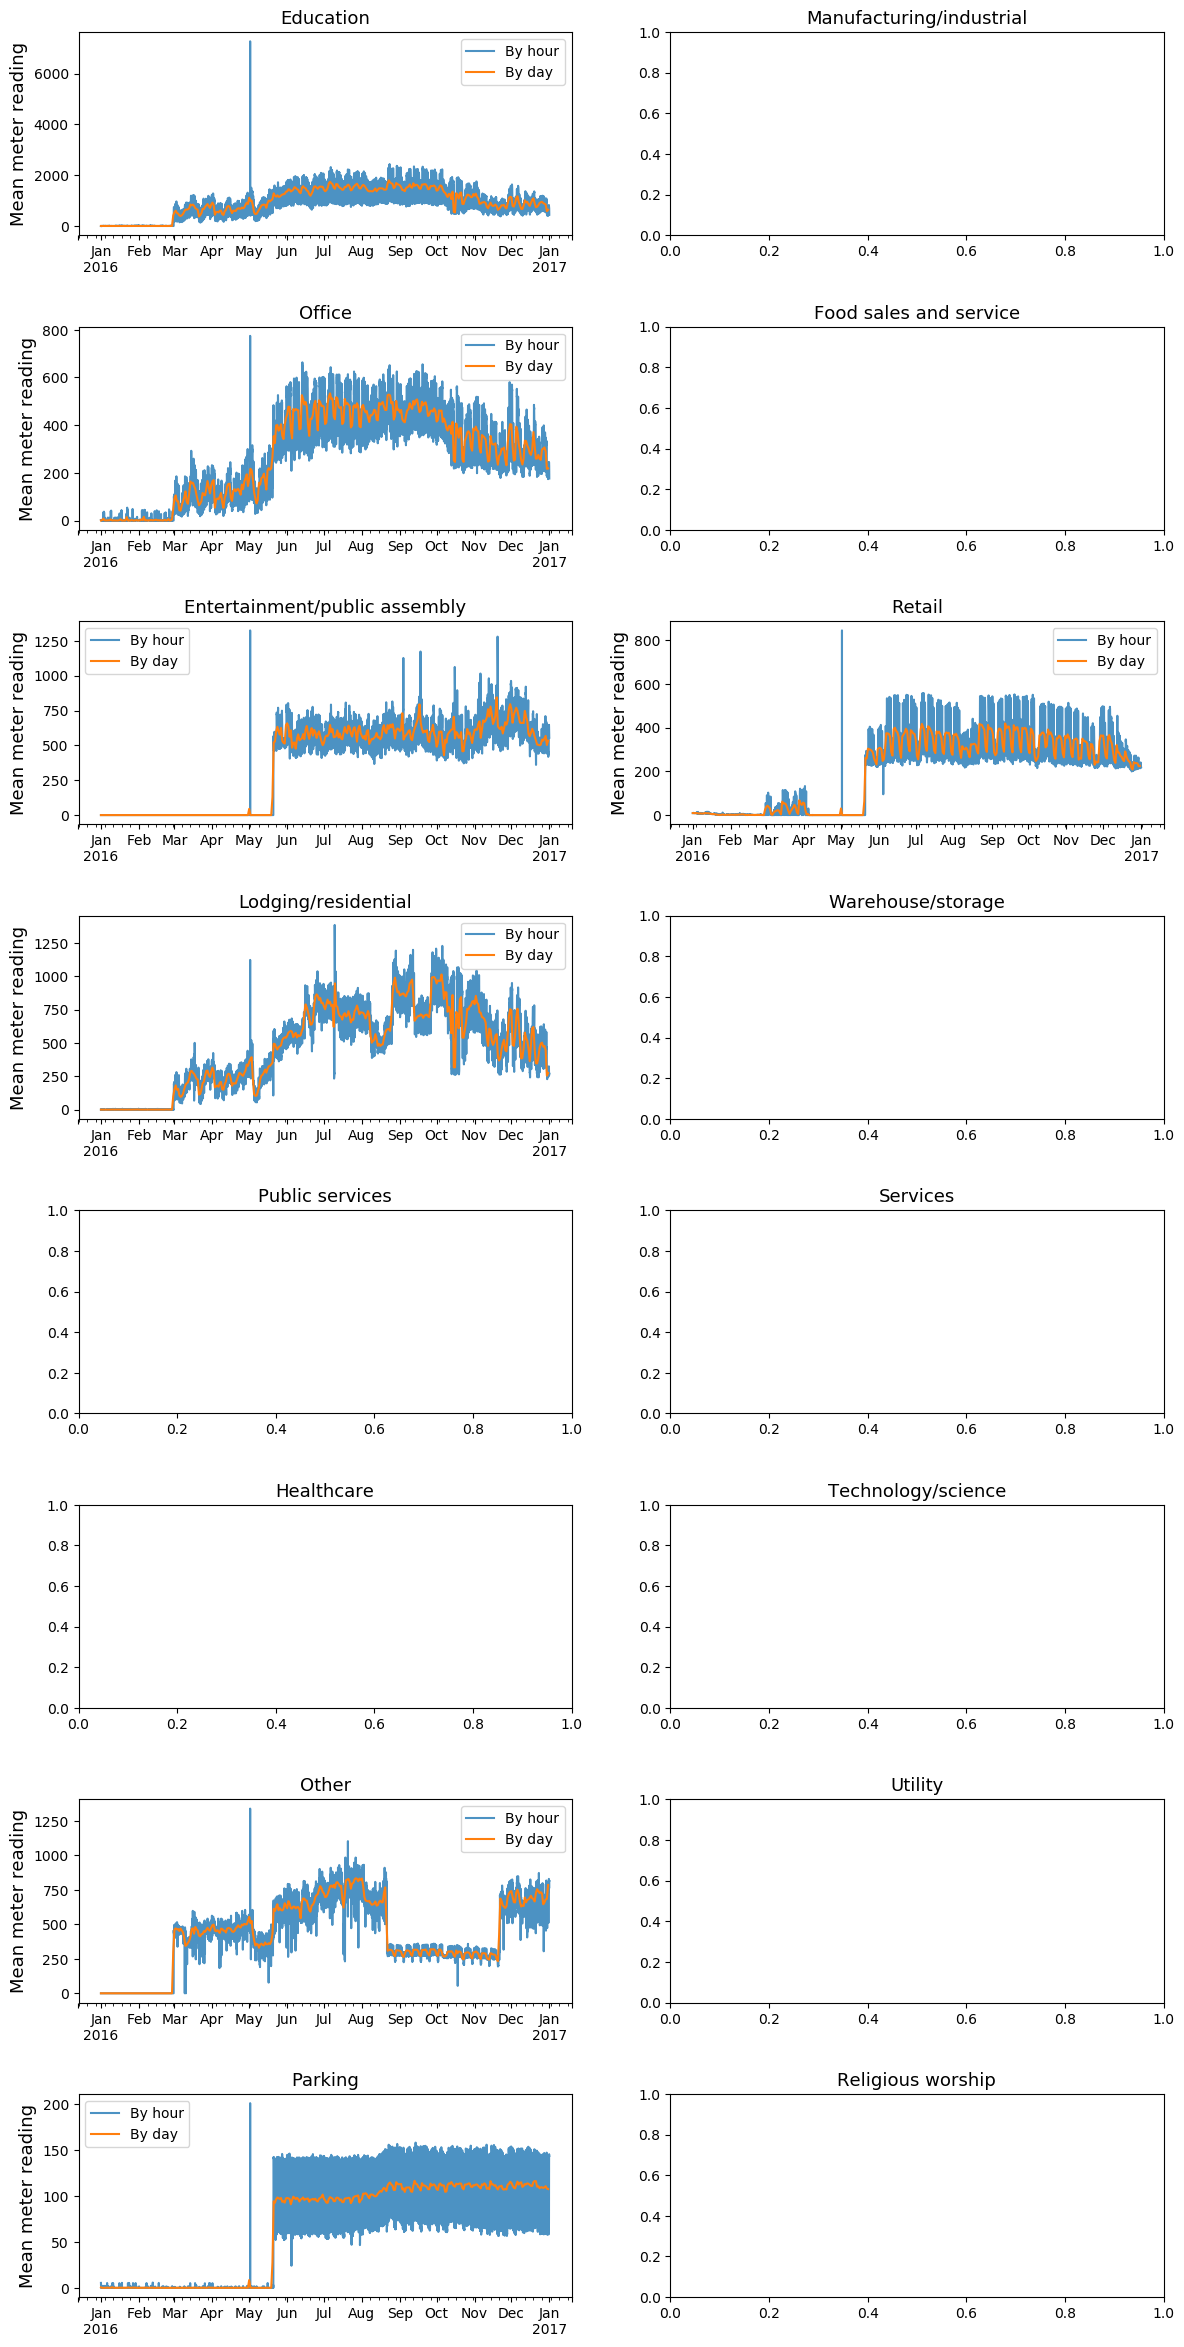

In [32]:
#ean meter reading by primary_use for site_id==0
fig, axes = plt.subplots(8,2,figsize=(14, 30), dpi=100)
for i, use in enumerate(train['primary_use'].value_counts().index):
    try:
        train[(train['site_id'] == 0) & (train['primary_use'] == use)][['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes[i%8][i//8], alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Mean meter reading', fontsize=13);
        train[(train['site_id'] == 0) & (train['primary_use'] == use)][['timestamp', 'meter_reading']].set_index('timestamp').resample('D').mean()['meter_reading'].plot(ax=axes[i%8][i//8], alpha=1, label='By day', color='tab:orange').set_xlabel('');
        axes[i%8][i//8].legend();
    except TypeError:
        pass
    axes[i%8][i//8].set_title(use, fontsize=13);
    plt.subplots_adjust(hspace=0.45)

In [44]:
##find meter is 0.0
meter_zero = train[train['meter_reading'] == 0.0]
meter_zero_count = meter_zero['building_id'].value_counts().sort_values()#.[['timestamp', 'meter_reading']].set_index('timestamp').resample('D').mean()['meter_reading'].
print(len(meter_zero),'number of zero meter')
display(meter_zero_count)


1873976 number of zero meter


1060        1
1368        1
1389        1
372         1
1141        1
382         1
350         1
1029        1
1369        1
204         1
1423        1
408         1
1179        1
1352        1
1062        1
557         1
335         1
1182        1
422         1
213         1
261         1
531         1
480         1
299         1
308         1
1049        1
512         1
197         1
1051        1
1065        1
        ...  
1302     8011
794      8240
176      8533
774      8535
187      8636
279      8808
287      8866
1018     8870
747      8920
171      8986
163      9049
771      9222
1250     9270
228      9309
1098     9321
802      9432
1000     9503
263      9604
244      9617
797      9708
1270     9727
1017     9781
1237    10669
1218    10689
1003    11340
1324    11579
1022    12009
1232    12321
799     14854
954     16031
Name: building_id, Length: 959, dtype: int64

In [46]:
display(meter_zero[meter_zero['building_id'] == 1302])

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
2009,1302,3,2016-01-01 00:00:00,0.0,14,Office,90411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4302,1302,3,2016-01-01 01:00:00,0.0,14,Office,90411,NaN,NaN,5.6,0.0,-0.6,0.0,1019.299988,300.0,2.6
6601,1302,3,2016-01-01 02:00:00,0.0,14,Office,90411,NaN,NaN,5.6,4.0,-0.6,0.0,1019.400024,300.0,2.6
8897,1302,3,2016-01-01 03:00:00,0.0,14,Office,90411,NaN,NaN,5.6,NaN,-1.1,0.0,1019.400024,NaN,1.5
11193,1302,3,2016-01-01 04:00:00,0.0,14,Office,90411,NaN,NaN,5.0,NaN,-2.2,0.0,1019.200012,290.0,3.1
13487,1302,3,2016-01-01 05:00:00,0.0,14,Office,90411,NaN,NaN,4.4,NaN,-2.2,0.0,1018.900024,300.0,4.1
15781,1302,3,2016-01-01 06:00:00,0.0,14,Office,90411,NaN,NaN,4.4,NaN,-2.8,0.0,1018.400024,300.0,2.6
22664,1302,3,2016-01-01 09:00:00,0.0,14,Office,90411,NaN,NaN,3.3,0.0,-3.3,0.0,1018.200012,280.0,3.1
27259,1302,3,2016-01-01 11:00:00,0.0,14,Office,90411,NaN,NaN,3.3,0.0,-3.3,0.0,1017.900024,280.0,2.6
29555,1302,3,2016-01-01 12:00:00,0.0,14,Office,90411,NaN,NaN,2.8,2.0,-3.3,0.0,1017.799988,300.0,2.6


In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
building_primary = le.fit_transform(['a','a','b','c','c'])


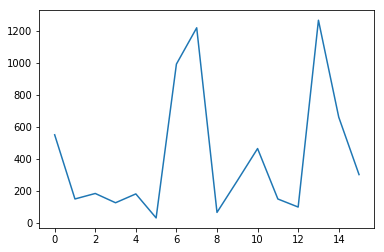

In [89]:
train_ex = train[~train['building_id'].isin([1099])]
fig,ax = plt.subplots(1,1)


In [ ]:

train_ex = train[~train['building_id'].isin([1099])]
ind = np.arange(len(train_ex))
width = 0.35

fig, axes = plt.subplots(1,1,figsize=(14, 6), dpi=100)
tr = axes.bar(ind, train_ex, width, color='royalblue')


axes.set_ylabel('Normalized number of observations')
axes.set_xlabel('site_id')
# axes.set_xticks(ind + width / 2)
#axes.set_xticklabels(train_ex['site_id'].value_counts().sort_index().index, rotation=0)
axes2 = axes.twinx()
mr = axes2.plot(ind,train_ex[['site_id', 'meter_reading']].groupby('site_id')['meter_reading'].mean(), label='Mean meter reading')
axes2.grid(False)
axes2.tick_params(axis='y', labelcolor='tab:orange')
axes2.set_ylabel('Mean meter reading by site_id', color='tab:orange')
#axes.legend([tr], ['Train'], facecolor='white')
axes2.legend(loc=2, facecolor='white')


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
<class 'pandas.core.frame.DataFrame'>


In [1]:
print(train[train['building_id'] == 0]['square_feet'].value_counts())

In [ ]:
null_sum = train.apply(lambda x : x.isna())